# magnitude frequency plots for different SHARES and SEDIMENT input scenarious 

In [17]:
# import data
# convert units
# calculate magnitudes and frequency 
# plot things 



In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# parameters
area = 4.83
# unit conversion
cf = (area * 10**6) * 10**-3  # km2 to m2 and mm to m

# functions

def calculate_monthly_sediment_yield(sediments):    

    # Create DataFrame for sediments with area considered
    sediments_area = pd.DataFrame()
    sediments_area['D'] = pd.to_datetime(sediments.D)
    sediments_area['Q100'] = sediments.Q100 * cf
    sediments_area['dfs'] = sediments.dfs * cf

    sediments_area['Qstl'] = sediments.Qstl * cf
    sediments_area['Qdftl'] = sediments.Qdftl * cf

    # reset index to date
    sediments_area = sediments_area.set_index('D')

    # Resample to monthly and calculate sum
    sym = sediments_area.resample('m').sum()

    # Calculate monthly sediment yield mean
    symm_month = sym.groupby(by=sym.index.month).mean().reset_index()

    return symm_month



In [20]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/supply_limited/langtang_annual_mean/cellnr12/'
SedOut = pd.read_csv(path + 'Sediment.out')

In [21]:
df = calculate_monthly_sediment_yield(SedOut)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

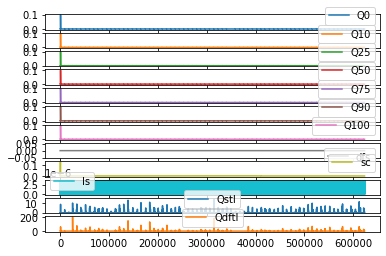

In [22]:
SedOut.plot(subplots = True)

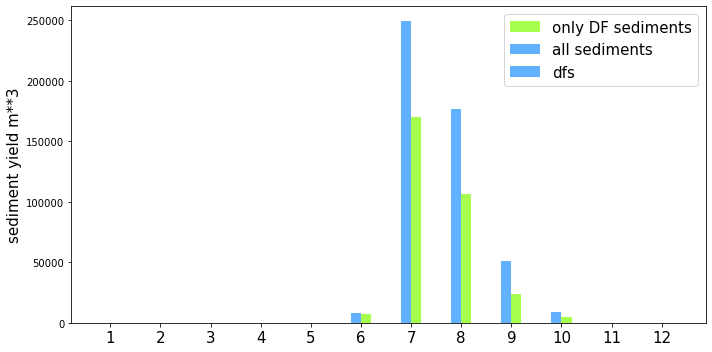

In [16]:
## figure to count all lakes

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.2
ax.bar(x=df.D+0.1, height=df.Qdftl, width=width, label='only DF sediments',  alpha=0.7, color='chartreuse')
ax.bar(x=df.D-0.1,     height=df.Qstl, width=width,label='all sediments' , alpha=0.7, color= 'dodgerblue')
ax.bar(x=df.D+0.2,     height=df.dfs, width=width,label='dfs' , alpha=0.7, color= 'dodgerblue')

ax.set_xticks(df.D)
ax.set_xticklabels(df.D, fontsize=15)#rotation=45)
ax.legend(fontsize=15, )
ax.set_ylabel('sediment yield m**3', fontsize=15)
fig.tight_layout()

## time series plots 

In [23]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_tl = pd.read_csv(path + 'transport_limited_default/langtang/cellnr21/Sediment.out')
Sed_tl_gl = pd.read_csv(path + 'transport_limited_glaciers/langtang/cellnr21/Sediment.out')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Sediment.out')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr21/Sediment.out')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr21/Sediment.out')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr21/Sediment.out')


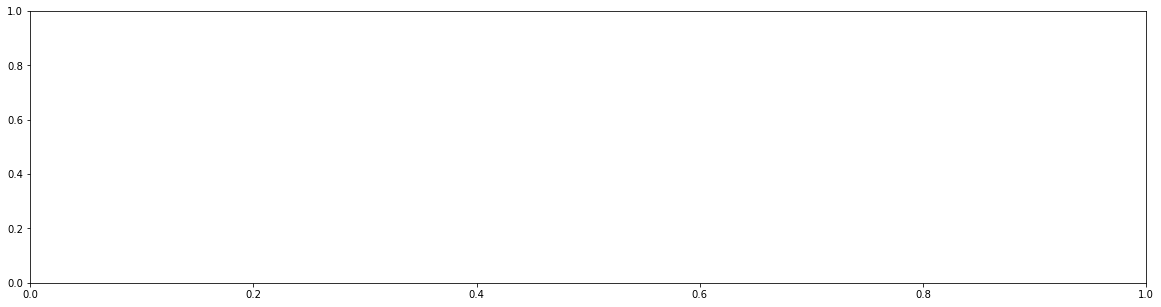

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
